In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# create a neural network class inheriting from the nn.Module
# Call it NeuralNetwork and make, and use "pass" in the constructor
# so that it doesn't give an error
# Instantiate one instance of it in variable net

net = 0

class NeuralNetwork(nn.Module):
    def __init__(self ):
        super(NeuralNetwork, self).__init__()
        pass

net = NeuralNetwork()

In [3]:
assert isinstance(net, NeuralNetwork)

In [4]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim and num_hidden, respectively the dimension of 
# the input and the number of hidden neurons
# use pass again

class NeuralNetwork(nn.Module):
    pass
    def __init__(self, input_dim, num_hidden):
        super(NeuralNetwork).__init__()
        pass


In [5]:
assert NeuralNetwork(input_dim=10, num_hidden=16)

In [6]:
# Rewrite the NeuralNetwork class so that the constructor receives
# as input the input_dim, num_hidden1 and num_hidden2, respectively the dimension of 
# the input and the number of hidden neurons for the first fully connected
# layer and the second. Define the attributes in the constructor
# that consists of the layers, call them fc1, fc2 and fc3 and a sigmoid.
# use pass again. Be careful to put the dimensions in the right places!
# Since we will do a binary classification problem, fc3 will have 1 neuron
# as output

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_hidden1, num_hidden2):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, num_hidden1)
        self.fc2 = nn.Linear(num_hidden1, num_hidden2)
        self.fc3 = nn.Linear(num_hidden2, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        layer1 = self.fc1(x)
        act1 = self.sigmoid(layer1)
        layer2 = self.fc2(act1)
        act2 = self.sigmoid(layer2)
        layer3 = self.fc3(act2)
        out = self.sigmoid(layer3)
        return out
        
        

In [7]:
net = NeuralNetwork(16, 16, 16)
assert net.fc1
assert net.fc2
assert net.fc3
assert net.sigmoid

In [8]:
# Define the forward pass to make a reasonable use of the attributes
# you defined before. Follow the same reasoning we used in class

model = NeuralNetwork(10, 7, 8)


In [9]:
model.parameters()

<generator object Module.parameters at 0x000001A28C77A270>

In [10]:
# For training a model, use the following optimizer and loss

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()


In [ ]:
# train a neural network (feel free to choose the num_hidden1 and num_hidden2)
# on the dataset in data.csv file
# You'll have fun with conflicting shapes and types and tensors, but
# you'll get those errors anyway. Let's go into the wild and learn
# by reading the errors and trying to understand them! :)
# You can always use the provided Workbook

In [11]:
data = pd.read_csv('data.csv', header = None)
data.head()

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


In [12]:
data.shape

(100, 3)

In [15]:
X_tensor = torch.tensor(data.drop(2, axis=1).values, dtype=torch.float)
y_tensor = torch.tensor(data[2].values, dtype=torch.float).view(-1,1)

In [16]:
y_tensor.shape

torch.Size([100, 1])

In [18]:
model = NeuralNetwork(X_tensor.shape[1],16, 8)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()
y_pred_tensor = model(X_tensor)
loss_value = loss(y_pred_tensor, y_tensor)
print(f"Initial loss: {loss_value.item():.2f}")

Initial loss: 0.74


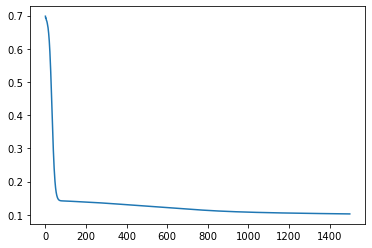

In [21]:
model = NeuralNetwork(X_tensor.shape[1],64, 16)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss = nn.BCELoss()
loss_values = []
epochs = 1500
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_tensor)
    loss_value = loss(y_pred, y_tensor)
    loss_value.backward()
    optimizer.step()
    loss_values.append(loss_value.detach())

plt.plot(list(range(epochs)), loss_values)
plt.show()    